필요라이브러리 로드

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
rating_df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/ratings.dat',
            sep='::', header=None)

rating_df.columns = ['user_id','movie_id','rating','time']
rating_df.head()

<ipython-input-133-ef897e946d89>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/ratings.dat',


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [134]:
movie_df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/m.dat',
            sep='::', header=None,engine='python')
movie_df.columns = ['movie_id','title','genre']
movie_df.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [135]:
# Quize 1 : title 컬럼에서 연도를 분리해서 year 컬럼을 만드세요
# 컬럼에 apply를 통한 람다함수
# 컬럼에 str.extract 를통한 정규식을 적용
movie_df['year'] = movie_df['title'].str.extract(r'\((\d{4})\)')
movie_df.head()

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [136]:
user_df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/user.dat',
            sep='::', header=None,engine='python')
user_df.columns = ['user_id','gender','age','occupation','zipcode']
user_df.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


EDA 탐색적 데이터 분석

In [137]:
# 총 영화의 개수를 출력
print(f'영화의 총 개수는 : {len(movie_df)}')
len(movie_df['movie_id'].unique())

영화의 총 개수는 : 3883


3883

In [138]:
movie_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

In [139]:
# 연도별 영화 개수가 많은 top10 년도를 출력
# 연도별 count
movie_df['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

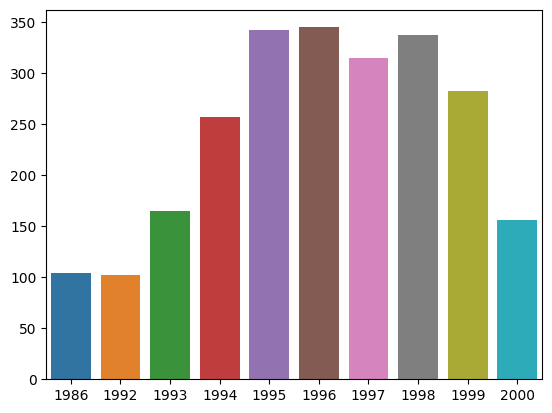

In [140]:
# 연도별 top10의 영화 개수를 시각화 - bar
temp = movie_df['year'].value_counts().head(10)
temp.sort_index()
sns.barplot(x = temp.sort_index().index, y = temp.sort_index().values)
plt.show()

In [141]:
# 장르별
movie_df['genre'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genre, Length: 301, dtype: int64

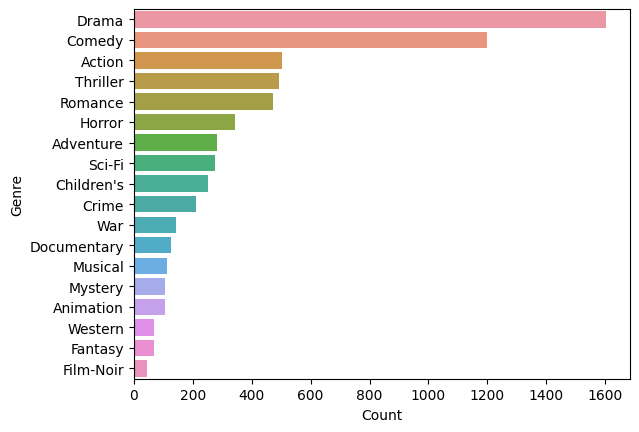

In [142]:
# 가장 많이 등장한 장르의 속성을 추출
genre_dic = {}
genre_dic.keys()
for row in movie_df['genre']:
  for col in row.split('|'):
    if col in genre_dic.keys():
      genre_dic[col] += 1
    else:
      genre_dic[col] = 1
genre_dic   
# value가 가장 큰 순으로 정렬
temp = sorted(genre_dic.items(),key= lambda x : x[1])[::-1]
temp = pd.DataFrame(temp)
sns.barplot(data=temp,x=1,y=0)
plt.ylabel('Genre')
plt.xlabel('Count')
# plt.xticks(rotation=90)
plt.show()

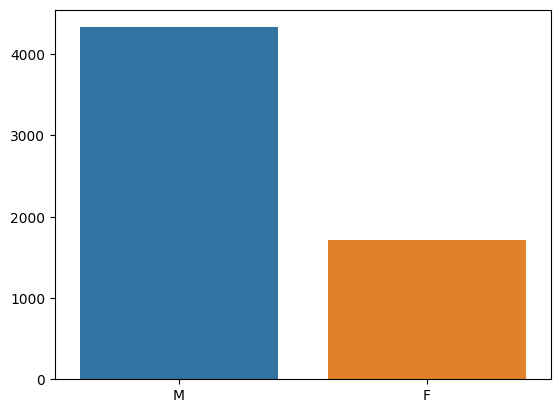

In [143]:
# 다음조건을 탐색해서 시각화
# 유저의 성별
temp = user_df['gender'].value_counts()
sns.barplot(x = temp.index, y =temp.values)
plt.show()

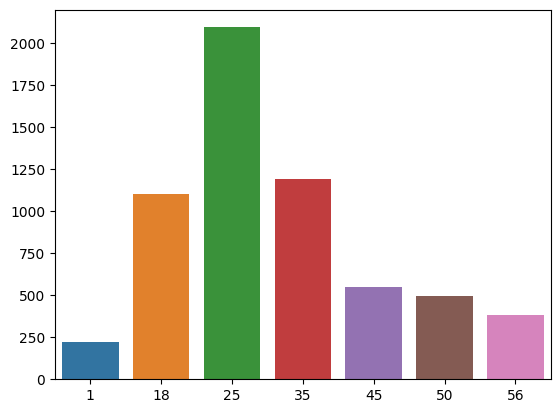

In [144]:
# 유저의 연령대(데이터가 많고 연속적인 흐름이면)  히스토그램..이 적절하지만  여기서는 몇개안되서 bar로 그려봄
temp = user_df['age'].value_counts()
sns.barplot(x = temp.index, y =temp.values)
plt.show()

평점 데이터 정보 탐색

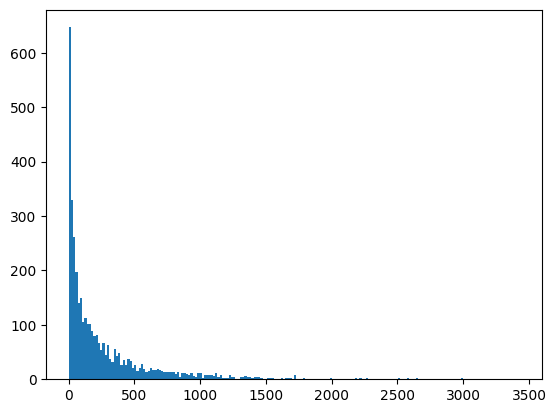

In [145]:
# 각 영화별 평가 받은 횟수
m_rate_count = rating_df.groupby(['movie_id'])['rating'].count().values
plt.hist(m_rate_count,bins=200)
plt.show()

In [146]:
# 영화별 평균 평점, 평가횟수
temp = rating_df.groupby(['movie_id'])['rating'].agg(['count','mean'])
temp.head()

,count,mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


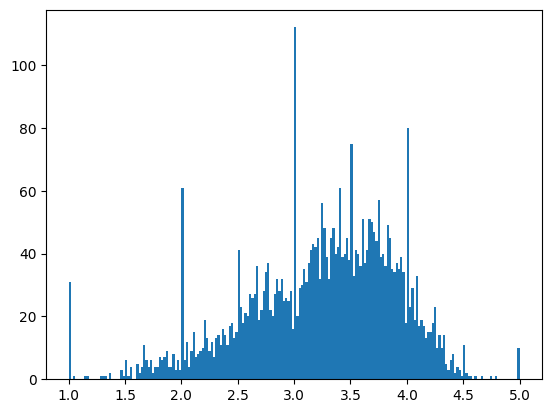

In [147]:
plt.hist(temp['mean'],bins=200)
plt.show()

In [148]:
# 100번 이상 평가를 받은 영화중에 평점이 높은 10개 영화제목 출력
temp  = temp[temp['count'] > 100].sort_values(by='mean',ascending=False).head(10)
temp

,count,mean
movie_id,,
2019,628,4.560510
318,2227,4.554558
858,2223,4.524966
745,657,4.520548
50,1783,4.517106
527,2304,4.510417
1148,882,4.507937
922,470,4.491489
1198,2514,4.477725


In [149]:
temp = pd.merge(temp,movie_df,how='left',left_on=temp.index, right_on='movie_id')
temp = temp.set_index('movie_id')

In [150]:
temp

,count,mean,title,genre,year
movie_id,,,,,
2019,628,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama,1954
318,2227,4.554558,"Shawshank Redemption, The (1994)",Drama,1994
858,2223,4.524966,"Godfather, The (1972)",Action|Crime|Drama,1972
745,657,4.520548,"Close Shave, A (1995)",Animation|Comedy|Thriller,1995
50,1783,4.517106,"Usual Suspects, The (1995)",Crime|Thriller,1995
527,2304,4.510417,Schindler's List (1993),Drama|War,1993
1148,882,4.507937,"Wrong Trousers, The (1993)",Animation|Comedy,1993
922,470,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir,1950
1198,2514,4.477725,Raiders of the Lost Ark (1981),Action|Adventure,1981


In [151]:
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [152]:
rating_df[['user_id',	'movie_id'	,'rating']].set_index(['user_id',	'movie_id'])

rating
user_id movie_id        
1       1193           5
        661            3
        914            3
        3408           4
        2355           5
...                  ...
6040    1091           1
        1094           5
        562            5
        1096           4
        1097           4

[1000209 rows x 1 columns]

In [153]:
rating_df[['user_id',	'movie_id'	,'rating']].set_index(['user_id',	'movie_id']).unstack()

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6040 rows x 3706 columns]

수학적 기법을 활용한 평점 예측
  - SVD 를 활용하여 빈칸 채우기

In [154]:
# SVD 특이값 분해(Singular VAlue Decompositon) - 임의의 3개의 행렬의 곱으로 분해
# A = UΣV^T
# U : MxN 직교 행렬 
# Σ : MxN 직사각 대각 행렬 
# V : :NxN 직교 행렬 
# 특징은 원본 행렬을 재 구성할수 있다.
# 차원축소, 노이즈제거, 데이터 압축등.
# 추천시스템 : 협업필터링 알고리즘에 사용  사용자 - 아이템을 행렬분해 숨겨진 사용자와 아이템의 특성을 추출 이를기반으로
# 맞춤형 추천시스템 구현

In [155]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
reader = Reader(rating_scale=(1,5))

In [157]:
rating_dict = {
    'item_id' : [1,2,3,1,2,3,2],
    'user_id' : ['a','a','a','b','b','b','c'],
    'rating' : [2,4,4,2,5,4,5]
}
df = pd.DataFrame(rating_dict)
df.head()

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5


In [158]:
# 데이터 프레임을 행렬로 변환
df_matrix_table = df.set_index(['user_id',	'item_id']).unstack().fillna(0)
df_matrix_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

SVD를 이용한 빈칸 채우기 학습

In [162]:
data = Dataset.load_from_df(df =df[['item_id',	'user_id',	'rating']], reader=reader)
train_data = data.build_full_trainset()

SVD 모델 학습

In [164]:
model = SVD(
    n_factors = 8,        # 잠재요인의 개수,높으면 모델의 표현력인 증가, 계산비용도 증가
    lr_all = 0.005,       # 전체학습률 : 학습하는 속도
    reg_all = 0.02,       # 전체 정규화 : 가중치를 정규화, 과적합 방지
    n_epochs = 10         
)
model.fit(train_data)

학습한 모델을 기반으로 빈공간의 점수를 예측

In [169]:
test_data = train_data.build_anti_testset()  # 학습에 사용된 유저 또는 아이템이인데.. 점수는 매겨지지 않은 데이터
prediction = model.test(test_data)
for uid,iid,_,predicted_rating,_ in prediction:
  print(f'item id:{uid}, user:{iid}, predicted rating : {predicted_rating}')

item id:1, user:c, predicted rating : 3.6255620230204877
item id:3, user:c, predicted rating : 3.8307407608873216


In [166]:
prediction

[Prediction(uid=1, iid='c', r_ui=3.7142857142857144, est=3.6255620230204877, details={'was_impossible': False}),
 Prediction(uid=3, iid='c', r_ui=3.7142857142857144, est=3.8307407608873216, details={'was_impossible': False})]

In [170]:
test_data = train_data.build_testset()  # 학습에 사용된 유저 또는 아이템이인데.. 점수는 매겨지지 않은 데이터
prediction = model.test(test_data)
# for uid,iid,_,predicted_rating,_ in prediction:
#   print(f'item id:{uid}, user:{iid}, predicted rating : {predicted_rating}')
prediction

[Prediction(uid=1, iid='a', r_ui=2.0, est=3.5542626003235083, details={'was_impossible': False}),
 Prediction(uid=1, iid='b', r_ui=2.0, est=3.5515281294799816, details={'was_impossible': False}),
 Prediction(uid=2, iid='a', r_ui=4.0, est=3.800777855416045, details={'was_impossible': False}),
 Prediction(uid=2, iid='b', r_ui=5.0, est=3.8528500130806305, details={'was_impossible': False}),
 Prediction(uid=2, iid='c', r_ui=5.0, est=3.9114251098748816, details={'was_impossible': False}),
 Prediction(uid=3, iid='a', r_ui=4.0, est=3.7050794716911986, details={'was_impossible': False}),
 Prediction(uid=3, iid='b', r_ui=4.0, est=3.745212515298817, details={'was_impossible': False})]

평가하지 않은 영화 점수 예측

In [174]:
print(rating_df['rating'].unique())
# 평점의 척도를 1~5까지 설정
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_df[['user_id','movie_id','rating']],reader)
train_data = data.build_full_trainset()  # 전체데이터를 가지고 학습하기
# SVD 모델로 학습
model = SVD(
    n_factors = 8,        # 잠재요인의 개수,높으면 모델의 표현력인 증가, 계산비용도 증가
    lr_all = 0.005,       # 전체학습률 : 학습하는 속도
    reg_all = 0.02,       # 전체 정규화 : 가중치를 정규화, 과적합 방지
    n_epochs = 10         
)
model.fit(train_data) 

[5 3 4 2 1]


In [193]:
# 점수를 예측할 타겟유저를 선정 4인 유저를 선택
target_user_id = 4
target_user_data = rating_df[rating_df['user_id']==target_user_id]
target_user_data.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [181]:
# 유저가 4인 영화평점의 히스토리 정보를 추출
target_user_movie_rating_dict =  dict(zip(target_user_data['movie_id'].values, target_user_data['rating'].values))
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [192]:
# 타겟유저가 보지 않은 영화중 예상평점이 높은 10개를 선정
# 타겟유저가 보지않은 영화 정보를 테스트 데이터로 생성  (타겟아이디,영화아이디,평점)
no_watch_target_userid = set(movie_df['movie_id'])-set(target_user_movie_rating_dict.keys())
len(no_watch_target_userid),len(target_user_movie_rating_dict.keys()), len(movie_df['movie_id'])

(3862, 21, 3883)

In [215]:
test_data = []
for movie_id in no_watch_target_userid:
  test_data.append((target_user_id, movie_id, 0))

In [220]:
model.test(test_data)[:3]  # 예측

[Prediction(uid=4, iid=1, r_ui=0, est=4.339818319494563, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.4352426124776327, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=3.198979131555055, details={'was_impossible': False})]